In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/austinmurphy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## D_ICD

In [2]:
d_icd = pd.read_csv("../data/D_ICD_DIAGNOSES.csv")
print("Number of unique ICD9 codes: {}".format(len(d_icd.ICD9_CODE.unique())))
d_icd.head()

Number of unique ICD9 codes: 14567


,ROW_ID,ICD9_CODE,SHORT_TITLE,LONG_TITLE
0,174,01166,TB pneumonia-oth test,"Tuberculous pneumonia [any form], tubercle bac..."
1,175,01170,TB pneumothorax-unspec,"Tuberculous pneumothorax, unspecified"
2,176,01171,TB pneumothorax-no exam,"Tuberculous pneumothorax, bacteriological or h..."
3,177,01172,TB pneumothorx-exam unkn,"Tuberculous pneumothorax, bacteriological or h..."
4,178,01173,TB pneumothorax-micro dx,"Tuberculous pneumothorax, tubercle bacilli fou..."


In [3]:
d_icd['first3'] = d_icd['ICD9_CODE'].apply(lambda x: x[:3])

In [4]:
d_icd.head()

,ROW_ID,ICD9_CODE,SHORT_TITLE,LONG_TITLE,first3
0,174,01166,TB pneumonia-oth test,"Tuberculous pneumonia [any form], tubercle bac...",011
1,175,01170,TB pneumothorax-unspec,"Tuberculous pneumothorax, unspecified",011
2,176,01171,TB pneumothorax-no exam,"Tuberculous pneumothorax, bacteriological or h...",011
3,177,01172,TB pneumothorx-exam unkn,"Tuberculous pneumothorax, bacteriological or h...",011
4,178,01173,TB pneumothorax-micro dx,"Tuberculous pneumothorax, tubercle bacilli fou...",011


In [5]:
# • 001-139 Infectious And Parasitic Diseases
# • 140-239 Neoplasms
# • 240-279 Endocrine, Nutritional And Metabolic Diseases, And Immunity Disorders
# • 280-289 Diseases Of The Blood And Blood-Forming Organs
# • 290-319 Mental Disorders
# • 320-389 Diseases Of The Nervous System And Sense Organs
# • 390-459 Diseases Of The Circulatory System
# • 460-519 Diseases Of The Respiratory System
# • 520-579 Diseases Of The Digestive System
# • 580-629 Diseases Of The Genitourinary System
# • 630-679 Complications Of Pregnancy, Childbirth, And The Puerperium
# • 680-709 Diseases Of The Skin And Subcutaneous Tissue
# • 710-739 Diseases Of The Musculoskeletal System And Connective Tissue
# • 740-759 Congenital Anomalies
# • 760-779 Certain Conditions Originating In The Perinatal Period
# • 780-799 Symptoms, Signs, And Ill-Defined Conditions
# • 800-999 Injury And Poisoning
# • V01-V91 Supplementary Classification Of Factors Influencing Health Status And Contact
# With Health Services
# • E000-E999 Supplementary Classification Of External Causes Of Injury And Poisoning

In [6]:
d_icd_ve = d_icd.loc[d_icd.first3.str.contains('V|E')]
d_icd_nove = d_icd.loc[~d_icd.first3.str.contains('V|E')]
d_icd_ve.shape[0] + d_icd_nove.shape[0] == d_icd.shape[0] 

True

In [7]:
d_icd_nove['high_level'] = pd.cut(d_icd_nove['first3'].astype(int), 
       bins=[0,139,239,279,289,319,389,459,519,579,629,679,709,739,759,779,799,999], 
       labels=range(17),
       right=True)

/Users/austinmurphy/opt/anaconda3/envs/attentionxml/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [8]:
d_icd_nove.head()

,ROW_ID,ICD9_CODE,SHORT_TITLE,LONG_TITLE,first3,high_level
0,174,01166,TB pneumonia-oth test,"Tuberculous pneumonia [any form], tubercle bac...",011,0
1,175,01170,TB pneumothorax-unspec,"Tuberculous pneumothorax, unspecified",011,0
2,176,01171,TB pneumothorax-no exam,"Tuberculous pneumothorax, bacteriological or h...",011,0
3,177,01172,TB pneumothorx-exam unkn,"Tuberculous pneumothorax, bacteriological or h...",011,0
4,178,01173,TB pneumothorax-micro dx,"Tuberculous pneumothorax, tubercle bacilli fou...",011,0


In [9]:
d_icd_ve['high_level'] = np.nan
d_icd_ve.loc[d_icd_ve.first3.str.contains('V'),'high_level'] = 17
d_icd_ve.loc[d_icd_ve.first3.str.contains('E'),'high_level'] = 18

/Users/austinmurphy/opt/anaconda3/envs/attentionxml/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/austinmurphy/opt/anaconda3/envs/attentionxml/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [10]:
d_icd_ve['high_level'] = d_icd_ve['high_level'].astype(int)

/Users/austinmurphy/opt/anaconda3/envs/attentionxml/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [11]:
d_icd = d_icd_nove.append(d_icd_ve)

In [12]:
d_icd.head()

,ROW_ID,ICD9_CODE,SHORT_TITLE,LONG_TITLE,first3,high_level
0,174,01166,TB pneumonia-oth test,"Tuberculous pneumonia [any form], tubercle bac...",011,0
1,175,01170,TB pneumothorax-unspec,"Tuberculous pneumothorax, unspecified",011,0
2,176,01171,TB pneumothorax-no exam,"Tuberculous pneumothorax, bacteriological or h...",011,0
3,177,01172,TB pneumothorx-exam unkn,"Tuberculous pneumothorax, bacteriological or h...",011,0
4,178,01173,TB pneumothorax-micro dx,"Tuberculous pneumothorax, tubercle bacilli fou...",011,0


## Diagnoses ICD

In [13]:
diag = pd.read_csv("../data/DIAGNOSES_ICD.csv")

In [14]:
diag = diag[diag['ICD9_CODE'].notna()]
print(diag.shape)
diag.head()

(651000, 5)


,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE
0,1297,109,172335,1.0,40301
1,1298,109,172335,2.0,486
2,1299,109,172335,3.0,58281
3,1300,109,172335,4.0,5855
4,1301,109,172335,5.0,4254


In [15]:
diag = diag.merge(d_icd[['ICD9_CODE','high_level']])

In [16]:
print("Number of rows:            {}".format(diag.shape[0]))
print("Number of unique subjects: {}".format(len(diag.SUBJECT_ID.unique())))
print("Number of unique visits:   {}".format(len(diag.HADM_ID.unique())))
print("Ave # of ICD9_codes per visit:   {}".format(diag.shape[0]/len(diag.HADM_ID.unique())))

print("Number of unique ICD9 codes:   {}".format(len(diag.ICD9_CODE.unique())))

Number of rows:            634709
Number of unique subjects: 46517
Number of unique visits:   58925
Ave # of ICD9_codes per visit:   10.771472210436997
Number of unique ICD9 codes:   6841


In [37]:
diag.to_csv("../data/diag.csv", sep='\t', index=False)
diag.head()

,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE,high_level
0,1297,109,172335,1.0,40301,6
1,1311,109,173633,1.0,40301,6
2,1019,109,131345,1.0,40301,6
3,1039,109,131376,1.0,40301,6
4,1059,109,135923,1.0,40301,6


Only roughly half of the ICD9 codes were marked in this datset

In [18]:
# Can I change the diag format to be subject_ID, hadm_ID, <ICD9_code> vector

def visit_codes(diag_df, col='ICD9_CODE', rename='ICD9_codes'):
    return diag_df.groupby(['HADM_ID','SUBJECT_ID'])[col].apply(list).reset_index(name=rename)

# diag_by_visit = diag.groupby(['HADM_ID','SUBJECT_ID'])['ICD9_CODE'].apply(list).reset_index(name='ICD9_codes')
diag_by_visit = visit_codes(diag, col='ICD9_CODE')

In [19]:
diag_by_visit.head()

,HADM_ID,SUBJECT_ID,ICD9_codes
0,100001,58526,"[5849, 40390, 5853, V5867, 5780, 25063, 25043,..."
1,100003,54610,"[53100, 4019, 5715, 07054, 2851, 45621, 53789,..."
2,100006,9895,"[486, 2761, V1582, 51881, 20300, V1251, 49320,..."
3,100007,23018,"[486, 4019, 5570, 56081]"
4,100009,533,"[2859, 41401, 4111, 2720, 4019, 25000, 44021, ..."


In [20]:
high_level_by_visit = visit_codes(diag, col='high_level', rename='high_levels')
high_level_by_visit['high_levels'] = high_level_by_visit['high_levels'].apply(lambda x: list(np.unique(x)))

In [21]:
high_level_by_visit.head()

,HADM_ID,SUBJECT_ID,high_levels
0,100001,58526,"[2, 5, 6, 8, 9, 11, 17]"
1,100003,54610,"[0, 3, 6, 8, 15]"
2,100006,9895,"[1, 2, 4, 7, 15, 17]"
3,100007,23018,"[6, 7, 8]"
4,100009,533,"[2, 3, 6, 16, 17]"


In [22]:
# merge ICD9_codes with high_levels
diag_ = diag_by_visit.merge(high_level_by_visit,
                   on=['HADM_ID','SUBJECT_ID'])

In [23]:
print(diag_.shape)
diag_.head()

(58925, 4)


,HADM_ID,SUBJECT_ID,ICD9_codes,high_levels
0,100001,58526,"[5849, 40390, 5853, V5867, 5780, 25063, 25043,...","[2, 5, 6, 8, 9, 11, 17]"
1,100003,54610,"[53100, 4019, 5715, 07054, 2851, 45621, 53789,...","[0, 3, 6, 8, 15]"
2,100006,9895,"[486, 2761, V1582, 51881, 20300, V1251, 49320,...","[1, 2, 4, 7, 15, 17]"
3,100007,23018,"[486, 4019, 5570, 56081]","[6, 7, 8]"
4,100009,533,"[2859, 41401, 4111, 2720, 4019, 25000, 44021, ...","[2, 3, 6, 16, 17]"


In [24]:
len(diag_['HADM_ID'].unique())

58925

In [25]:
num_codes_per_visit = diag_['ICD9_codes'].apply(lambda x: len(x))
num_hl_per_visit = diag_['high_levels'].apply(lambda x: len(x))

In [26]:
print("Number of ICD9 codes per visit:       {0:.{1}f}".format(np.mean(num_codes_per_visit),2))
print("Number of high level codes per visit: {0:.{1}f}".format(np.mean(num_hl_per_visit),2))

Number of ICD9 codes per visit:       10.77
Number of high level codes per visit: 5.67


In [27]:
print(num_codes_per_visit.min())
print(num_hl_per_visit.min())
# Every visit has at least 1 code

1
1


In [32]:
diag_.shape

(58925, 4)

In [34]:
diag_.to_csv("../data/diag_.csv", sep='\t', index=False)

## Notes

In [28]:
notes = pd.read_csv("../data/NOTEEVENTS.csv")

/Users/austinmurphy/opt/anaconda3/envs/attentionxml/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [35]:
notes.head()

,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION,CGID,ISERROR,TEXT
0,174,22532,167853.0,2151-08-04,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2151-7-16**] Dischar...
1,175,13702,107527.0,2118-06-14,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2118-6-2**] Discharg...
2,176,13702,167118.0,2119-05-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2119-5-4**] D...
3,177,13702,196489.0,2124-08-18,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2124-7-21**] ...
4,178,26880,135453.0,2162-03-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2162-3-3**] D...


In [36]:
print("Number of rows:            {}".format(notes.shape[0]))
print("Number of unique subjects: {}".format(len(notes.SUBJECT_ID.unique())))
print("Number of unique visits:   {}".format(len(notes.HADM_ID.unique())))

print("Unique Category values:")
print(notes.CATEGORY.unique())
print(notes.loc[notes.CATEGORY=='Discharge summary'].shape)

Number of rows:            2083180
Number of unique subjects: 46146
Number of unique visits:   58362
Unique Category values:
['Discharge summary' 'Echo' 'ECG' 'Nursing' 'Physician ' 'Rehab Services'
 'Case Management ' 'Respiratory ' 'Nutrition' 'General' 'Social Work'
 'Pharmacy' 'Consult' 'Radiology' 'Nursing/other']
(59652, 11)


In [37]:
def preprocess_notes(notes_df):
    """
    Preprocessing functin of the notes dataframe. Only return discharge summaries, reports,
       and drop unused columns
    @param notes_df:     notes dataframe
    
    """
    notes_ = notes_df.loc[notes.CATEGORY=='Discharge summary']#.drop(['CHARTDATE', 'CHARTTIME','STORETIME'])
    notes_['HADM_ID'] = notes_['HADM_ID'].apply(lambda x: int(x))
    
    notes_ = notes_.loc[notes_.DESCRIPTION == 'Report'] # removes 4475 records
    notes_ = notes_.drop(['CGID','ISERROR','STORETIME','CHARTTIME','CHARTDATE','CATEGORY','DESCRIPTION'],axis=1)
    return notes_



    

In [38]:
notes_ = preprocess_notes(notes)

/Users/austinmurphy/opt/anaconda3/envs/attentionxml/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [204]:
notes_.TEXT[0]

'Admission Date:  [**2151-7-16**]       Discharge Date:  [**2151-8-4**]\n\n\nService:\nADDENDUM:\n\nRADIOLOGIC STUDIES:  Radiologic studies also included a chest\nCT, which confirmed cavitary lesions in the left lung apex\nconsistent with infectious process/tuberculosis.  This also\nmoderate-sized left pleural effusion.\n\nHEAD CT:  Head CT showed no intracranial hemorrhage or mass\neffect, but old infarction consistent with past medical\nhistory.\n\nABDOMINAL CT:  Abdominal CT showed lesions of\nT10 and sacrum most likely secondary to osteoporosis. These can\nbe followed by repeat imaging as an outpatient.\n\n\n\n                            [**First Name8 (NamePattern2) **] [**First Name4 (NamePattern1) 1775**] [**Last Name (NamePattern1) **], M.D.  [**MD Number(1) 1776**]\n\nDictated By:[**Hospital 1807**]\nMEDQUIST36\n\nD:  [**2151-8-5**]  12:11\nT:  [**2151-8-5**]  12:21\nJOB#:  [**Job Number 1808**]\n'

In [39]:
notes_.head()

,ROW_ID,SUBJECT_ID,HADM_ID,TEXT
0,174,22532,167853,Admission Date: [**2151-7-16**] Dischar...
1,175,13702,107527,Admission Date: [**2118-6-2**] Discharg...
2,176,13702,167118,Admission Date: [**2119-5-4**] D...
3,177,13702,196489,Admission Date: [**2124-7-21**] ...
4,178,26880,135453,Admission Date: [**2162-3-3**] D...


In [40]:
notes_.head()['TEXT'][0]

'Admission Date:  [**2151-7-16**]       Discharge Date:  [**2151-8-4**]\n\n\nService:\nADDENDUM:\n\nRADIOLOGIC STUDIES:  Radiologic studies also included a chest\nCT, which confirmed cavitary lesions in the left lung apex\nconsistent with infectious process/tuberculosis.  This also\nmoderate-sized left pleural effusion.\n\nHEAD CT:  Head CT showed no intracranial hemorrhage or mass\neffect, but old infarction consistent with past medical\nhistory.\n\nABDOMINAL CT:  Abdominal CT showed lesions of\nT10 and sacrum most likely secondary to osteoporosis. These can\nbe followed by repeat imaging as an outpatient.\n\n\n\n                            [**First Name8 (NamePattern2) **] [**First Name4 (NamePattern1) 1775**] [**Last Name (NamePattern1) **], M.D.  [**MD Number(1) 1776**]\n\nDictated By:[**Hospital 1807**]\nMEDQUIST36\n\nD:  [**2151-8-5**]  12:11\nT:  [**2151-8-5**]  12:21\nJOB#:  [**Job Number 1808**]\n'

In [41]:
print(np.sum(~notes_['TEXT'].str.contains("Admission")))
print(np.sum(~notes_['TEXT'].str.contains("Discharge Date")))
print(np.sum(~notes_['TEXT'].str.contains("\[\*\*")))

59
325
1


In [42]:
np.sum(notes_['TEXT'].str.contains("Admission Date:"))

55114

In [43]:
print("Num rows:            {}".format(notes_.shape[0]))
print("Num unique HADM_IDs: {}".format(len(notes_['HADM_ID'].unique())))

Num rows:            55177
Num unique HADM_IDs: 52691


## To do: 

- clean up text column
    - remove "Addmission Date", etc. notes
    - Remove new line characters
- Take out unknown ICD9 codes?




Text column: 
- Remove new line characters, replace with a space
- Remove tab characters, replace with a space
- Remove all double spaces
- Remove headers, tails
- Remove trailing white space


Tokenize using spaCy library

In [89]:
blah = notes_.copy(deep=True).head(30)

In [90]:
blah.head()

,ROW_ID,SUBJECT_ID,HADM_ID,TEXT
0,174,22532,167853,Admission Date: [**2151-7-16**] Dischar...
1,175,13702,107527,Admission Date: [**2118-6-2**] Discharg...
2,176,13702,167118,Admission Date: [**2119-5-4**] D...
3,177,13702,196489,Admission Date: [**2124-7-21**] ...
4,178,26880,135453,Admission Date: [**2162-3-3**] D...


In [91]:
def clean_text(series):
    series = series.str.lower()
    series = series.str.replace('\n',' ',regex=False)
    series = series.str.replace('\t',' ',regex=False)
    series = series.str.replace('\s+', ' ', regex=True)
    series = series.str.replace("admission date: \[\*\*.*?\*\*\]",' ', regex=True)
    series = series.str.replace("discharge date: \[\*\*.*?\*\*\]", ' ', regex=True)
    series = series.str.replace("\[\*\*.*?\*\*\]", ' ', regex=True)
    series = series.str.replace('date of birth: ', ' ', regex=True)
    series = series.str.strip()
    series = series.str.replace('medquist.*', ' ', regex=True)
    series = series.str.replace('dictated by:', ' ', regex=True)
    series = series.str.replace('completed by:', ' ', regex=True)
    series = series.str.replace('\s+', ' ', regex=True)
    series = series.str.replace("[^a-zA-Z :.,/-]",'d',regex=True)
    series = series.str.replace(":",'',regex=False)
    series = series.str.replace("d{3,}", "", regex=True)
    series = series.str.strip()
    return series

In [92]:
blah.TEXT = clean_text(blah.TEXT)

In [93]:
blah.head()

,ROW_ID,SUBJECT_ID,HADM_ID,TEXT
0,174,22532,167853,service addendum radiologic studies radiologic...
1,175,13702,107527,sex f service micu and then to medicine histor...
2,176,13702,167118,service cardiothoracic allergies amlodipine at...
3,177,13702,196489,service medicine allergies amlodipine attendin...
4,178,26880,135453,sex m service medicine allergies patient recor...


In [94]:
blah.TEXT[25]

'service med allergies bactrim / amiodarone / quinine / codeine / zithromax attending chief complaint abdominal discomfort major surgical or invasive procedure ercp x d endotracheal intubation history of present illness the patient is an dd year old woman with pmh of esrd on hd, htn, and dm, who presented to the ed on with complaint of nausea, vomiting, abdominal pain, and diarrhea x d days. the patient also reported recent fever and chills. in the ed, patient had a low grade temperature of .d degrees. her abdomen was slightly distended, with no rigidity or rebound. admission laboratory data were notable for wbc d.d, elevated transaminases, and inr d.d. right upper quadrant ultrasound disclosed a d mm gallstone in the neck of the gallbladder. there was also a dmm gallstone in the common bile duct, without ductal dilatation. the patient was evaluated by surgery for her choledocholithiasis. the patient was also seen by the ercp fellow. the patient was not acutely ill last night, so she w

In [95]:
blah.TEXT[3]

'service medicine allergies amlodipine attending chief complaint copd exacerbation/shortness of breath major surgical or invasive procedure intubation arterial line placement picc line placement esophagogastroduodenoscopy history of present illness dd yo f with h/o chf, copd on d l oxygen at baseline, tracheobronchomalacia s/p stent, presents with acute dyspnea over several days, and lethargy. this morning patient developed an acute worsening in dyspnea, and called ems. ems found patient tachypnic at saturating  on dl. patient was noted to be tripoding. she was given a nebulizer and brought to the er. . according the patientds husband, she was experiencing symptoms consistent with prior copd flares. apparently patient was without cough, chest pain, fevers, chills, orthopnea, pnd, dysuria, diarrhea, confusion and neck pain. her husband is a physician and gave her a dose of levaquin this morning. . in the ed, patient was saturating  on nrb. cxr did not reveal any consolidation. per repor

## Merge

Can I merge notes_ and temp?

In [96]:
# How many HADM_IDs in notes_ are not in temp? (don't have ICD9 codes)
no_response = np.setdiff1d(notes_.HADM_ID, diag_by_visit.HADM_ID, assume_unique=False)

# how many HADM_IDs in temp are not in notes_? (don't have discharge notes)
no_notes = np.setdiff1d(diag_by_visit.HADM_ID, notes_.HADM_ID, assume_unique=False)


In [97]:
print(len(no_response))
print(no_response[:5])

print(len(no_notes))
print(no_notes[:5])

6
[109963 110220 141620 142890 148985]
6240
[100014 100017 100023 100033 100047]


In [98]:
dat = notes_.merge(right=diag_,
             how='inner',
             on=['HADM_ID', 'SUBJECT_ID'])

In [99]:
print(dat.shape)
dat.head()

(55170, 6)


,ROW_ID,SUBJECT_ID,HADM_ID,TEXT,ICD9_codes,high_levels
0,174,22532,167853,Admission Date: [**2151-7-16**] Dischar...,"[4254, 2762, 5119, 2639, 42731, 5070, 2113, 01...","[0, 1, 2, 6, 7]"
1,170,22532,167853,Admission Date: [**2151-7-16**] Dischar...,"[4254, 2762, 5119, 2639, 42731, 5070, 2113, 01...","[0, 1, 2, 6, 7]"
2,175,13702,107527,Admission Date: [**2118-6-2**] Discharg...,"[486, 2761, 2449, 49121, 311, 51881]","[2, 4, 7]"
3,176,13702,167118,Admission Date: [**2119-5-4**] D...,"[2762, 496, 5533, 45340]","[2, 6, 7, 8]"
4,177,13702,196489,Admission Date: [**2124-7-21**] ...,"[2762, 45829, 41401, 4019, E9320, 5849, 2449, ...","[2, 5, 6, 7, 8, 9, 17, 18]"


In [206]:
dat.tail()

,ROW_ID,SUBJECT_ID,HADM_ID,TEXT,ICD9_codes,high_levels,text_tok,text_tok_in,text_ready
55165,53613,43691,147266,sex f service neurology allergies no known all...,"[7455, 43820, 78001, 43301, 44324]","[6, 13, 15]","[sex, f, service, neurology, allergies, no, kn...","[sex, f, service, neurology, allergies, no, kn...",sex f service neurology allergies no known all...
55166,53614,80847,129802,sex f service neurosurgery allergies no known ...,"[3314, 53081, 2720, 5119, 4019, 2639, 49390, 4...","[0, 2, 5, 6, 7, 8, 12, 16]","[sex, f, service, neurosurgery, allergies, no,...","[sex, f, service, neurosurgery, allergies, no,...",sex f service neurosurgery allergies no known ...
55167,53615,41074,182558,sex m service medicine allergies no allergies/...,"[3314, 53081, 4019, 25000, 430, 431, V1083, 34...","[2, 5, 6, 8, 17]","[sex, m, service, medicine, allergies, no, all...","[sex, m, service, medicine, allergies, no, all...",sex m service medicine allergies no allergies/...
55168,53616,76397,184741,sex m service surgery allergies no known aller...,"[3051, 8052, E8150, 8600, 30550, 80703, 86500,...","[4, 16, 18]","[sex, m, service, surgery, allergies, no, know...","[sex, m, service, surgery, allergies, no, know...",sex m service surgery allergies no known aller...
55169,53617,87196,121964,sex m service surgery allergies no allergies/a...,"[2762, 4275, 9584, 80709, 8910, 86803, E8160, ...","[2, 6, 16, 18]","[sex, m, service, surgery, allergies, no, alle...","[sex, m, service, surgery, allergies, no, alle...",sex m service surgery allergies no allergies/a...


In [211]:
notes_.loc[notes_.HADM_ID==184741,].TEXT.values

array(["Admission Date:  [**2182-4-19**]              Discharge Date:   [**2182-4-22**]\n\nDate of Birth:  [**2163-1-18**]             Sex:   M\n\nService: SURGERY\n\nAllergies:\nNo Known Allergies / Adverse Drug Reactions\n\nAttending:[**First Name3 (LF) 4691**]\nChief Complaint:\ntrauma\n\nMajor Surgical or Invasive Procedure:\nnone\n\nHistory of Present Illness:\n19 M unrestrained driver in moderate speed rollover mva (car vs.\npole).  Pt found in back seat of upside down car which has slide\npast several poles. Pt states he recalls driving and likely fell\nasleep at the wheel.  He does not recall the accident or the\nscene (+LOC).\n\nIn the ED a CT scan of the head and neck were performed as well\nas a CT torso. FAST exam was positive. Pts injuries included\ngrade 3 splenic laceration and a L T8 transveres process\nfracture.\n\nPt was admitted to the TSICU in stable condition.\n\nPast Medical History:\nPMH: depression, anxiety, psychiatric admission age 15\nPSH: Lap appy, nephrolit

# Make changes to dat

In [100]:
dat.TEXT = clean_text(dat.TEXT)

In [101]:
print(dat.shape)
dat.head()

(55170, 6)


,ROW_ID,SUBJECT_ID,HADM_ID,TEXT,ICD9_codes,high_levels
0,174,22532,167853,service addendum radiologic studies radiologic...,"[4254, 2762, 5119, 2639, 42731, 5070, 2113, 01...","[0, 1, 2, 6, 7]"
1,170,22532,167853,history of present illness the patient is an d...,"[4254, 2762, 5119, 2639, 42731, 5070, 2113, 01...","[0, 1, 2, 6, 7]"
2,175,13702,107527,sex f service micu and then to medicine histor...,"[486, 2761, 2449, 49121, 311, 51881]","[2, 4, 7]"
3,176,13702,167118,service cardiothoracic allergies amlodipine at...,"[2762, 496, 5533, 45340]","[2, 6, 7, 8]"
4,177,13702,196489,service medicine allergies amlodipine attendin...,"[2762, 45829, 41401, 4019, E9320, 5849, 2449, ...","[2, 5, 6, 7, 8, 9, 17, 18]"


In [102]:
dat.to_csv("../data/clean_data.csv", index=False, sep='\n')

## Exploring dat

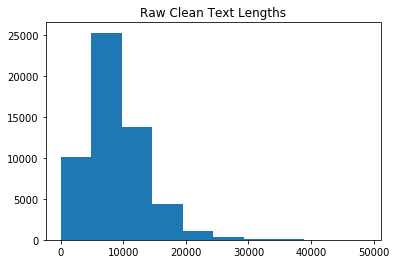

In [103]:
text_lengths = dat.TEXT.apply(lambda x: len(x))
plt.hist(text_lengths)
plt.title("Raw Clean Text Lengths")
plt.show()

In [104]:
np.mean(text_lengths)

8880.745459488853

#### How many unique words?

In [105]:
dat.TEXT.head()

0    service addendum radiologic studies radiologic...
1    history of present illness the patient is an d...
2    sex f service micu and then to medicine histor...
3    service cardiothoracic allergies amlodipine at...
4    service medicine allergies amlodipine attendin...
Name: TEXT, dtype: object

In [107]:
stop_words = set(stopwords.words('english'))
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [101]:
# from nltk.corpus import stopwords 
# from nltk.tokenize import word_tokenize 
  
# example_sent = "This is a sample sentence, showing off the stop words filtration."
  
# stop_words = set(stopwords.words('english')) 
  
# word_tokens = word_tokenize(example_sent) 
  
# filtered_sentence = [w for w in word_tokens if not w in stop_words] 
  
# print(word_tokens) 
# print(filtered_sentence) 

In [110]:
tokenized_notes = dat['TEXT'].apply(lambda x: word_tokenize(x.lower())) # taking forever (3+ minutes)

KeyboardInterrupt: 

In [ ]:
print(tokenized_notes.shape)
tokenized_notes.head()

In [157]:
## How will distribution look when I take out stop words? 
# flatten = lambda l: [item for sublist in l for item in sublist]
# small['text_'] = small['text_tok'].apply(lambda x: [word for word in x if word not in stop_words])

## Overfit on small dataset:

In [174]:
small = dat.copy(deep=True)[:5500]
tiny = dat.copy(deep=True)[:150]

In [153]:
import editdistance
import enchant

d = enchant.Dict("en_US")

def tokenize(series):
    return series.apply(lambda x: word_tokenize(x))

def all_vocab_flat(series):
    return [item for sublist in series for item in sublist]

def unique_vocab(vocab):
    """
    Returns unique array of words from list of vocab words
    """
    return np.unique(vocab)

# Count word occurance
def CountFrequency(my_list): 
    # Creating an empty dictionary  
    freq = {} 
    for item in my_list: 
        if (item in freq): 
            freq[item] += 1
        else: 
            freq[item] = 1
    return freq

def sep_freq_nonfreq(word_counts, thresh=5):
    """
    Separate frequent words from non-frequent words
    """
    frequent_words = {}
    out_of_vocab_words = {}
    for i in word_counts:
        if word_counts[i] >= thresh:
            frequent_words[i] = word_counts[i]
        else:
            out_of_vocab_words[i] = word_counts[i]
    
    print("Number of frequent words:     {}".format(len(frequent_words)))
    print("Number of out of vocab words: {}".format(len(out_of_vocab_words)))
    return frequent_words, out_of_vocab_words


def map_to_vocab(out_of_vocab_words, frequent_words, print_every=100):
    """
    Take out of vocab words and returns a map of their closest word
    
    First looks to find if that word exists already as a proper english word
    If it doesn't, find the closest word in the vocab already based on edit distance
    
    Returns: map of out_of_vocab words to their in_vocab word
    """
    i = 0
    new_word_map = {}
    for out_of_vocab_word in out_of_vocab_words:
        if i % print_every==0:
            perc=100*(i/len(out_of_vocab_words))
            print(int(perc),"%")
        min_dist = 10000
        closest_word = 'filler_word'
        if d.check(out_of_vocab_word):
            new_word_map[out_of_vocab_word] = out_of_vocab_word
            i += 1
            continue
        for word in frequent_words:
            dist = editdistance.distance(out_of_vocab_word, word)
            if dist < min_dist:
                min_dist = dist
                closest_word = word
        new_word_map[out_of_vocab_word] = closest_word
        i += 1
    return new_word_map

def replace_out_of_vocab_words(word_list, d):
    """
    Takes a list of tokens and returns a list of tokens with `out of vocab` words
       changed to their closest word in the dictionary 
       
    @param word_list: List[str]
    @param d:         Dictionary of word and their closest word
    """
    doc = []
    for word in word_list:
        if word in d:
            word = d[word]
        doc.append(word)
    return doc

In [168]:
def clean_the_text(df, print_every=1000):
    begin_time = time.time()
    df['text_tok'] = tokenize(df['TEXT'])
    vocab = all_vocab_flat(df['text_tok'])
    unique_vocab_ = unique_vocab(vocab)
    
    # Before masking non-alphabetical characters
    print("Number of total words:  ", len(vocab))
    print("Number of unique words: ", len(unique_vocab_))
    
    word_freq = CountFrequency(vocab)
    frequent_words, out_of_vocab_words = sep_freq_nonfreq(word_freq)
    
    print("Took %.2f sec" % (time.time() - begin_time))
    print()
    
    print("Mapping words to words in vocabulary / in English")
    
    out_to_vocab_dict = map_to_vocab(out_of_vocab_words, frequent_words, print_every=print_every)
    
    print("Total time: %.2f" % (time.time() - begin_time))
    
    df['text_tok_in'] = df['text_tok'].apply(lambda x: replace_out_of_vocab_words(x, out_to_vocab_dict))
    
    df['text_ready'] = df['text_tok_in'].apply(lambda x: " ".join(x))
    
    print("Total time: %.2f" % (time.time() - begin_time))
    
    return df, out_to_vocab_dict, word_freq

In [161]:
from sklearn.model_selection import train_test_split
def save_files(df, folder=None):
    df.to_csv("../data/"+folder+"/"+folder+"_data.csv", index=False, sep='\n')
    print("Saved file to disc. Now creating splits and saving:")
    
    train, test = train_test_split(df, test_size=0.2, random_state=0, shuffle=True)
    train, dev = train_test_split(train, test_size=0.25, random_state=0, shuffle=True)
    
    print("train.shape: ", train.shape)
    print("dev.shape: ", dev.shape)
    print("test.shape: ", test.shape)
    
    train['text_ready'].to_csv("../data/"+folder+"/train_text.csv", index=False, sep='\n')
    train['high_levels'].to_csv("../data/"+folder+"/train_labels.csv", index=False, sep='\n')
    dev['text_ready'].to_csv("../data/"+folder+"/dev_text.csv", index=False, sep='\n')
    dev['high_levels'].to_csv("../data/"+folder+"/dev_labels.csv", index=False, sep='\n')
    test['text_ready'].to_csv("../data/"+folder+"/test_text.csv", index=False, sep='\n')
    test['high_levels'].to_csv("../data/"+folder+"/test_labels.csv", index=False, sep='\n')

## On 'tiny' dataset with 100 rows

In [175]:
tiny, out_to_vocab_dict, word_freq = clean_the_text(tiny) # with 100 rows it took 35 seconds

Number of total words:   246287
Number of unique words:  12283
Number of frequent words:     3929
Number of out of vocab words: 8354
Took 1.94 sec

Mapping words to words in vocabulary / in English
0 %
11 %
23 %
35 %
47 %
59 %
71 %
83 %
95 %
Total time: 58.32
Total time: 58.35


In [176]:
tiny.head()

,ROW_ID,SUBJECT_ID,HADM_ID,TEXT,ICD9_codes,high_levels,text_tok,text_tok_in,text_ready
0,174,22532,167853,service addendum radiologic studies radiologic...,"[4254, 2762, 5119, 2639, 42731, 5070, 2113, 01...","[0, 1, 2, 6, 7]","[service, addendum, radiologic, studies, radio...","[service, addendum, radiologic, studies, radio...",service addendum radiologic studies radiologic...
1,170,22532,167853,history of present illness the patient is an d...,"[4254, 2762, 5119, 2639, 42731, 5070, 2113, 01...","[0, 1, 2, 6, 7]","[history, of, present, illness, the, patient, ...","[history, of, present, illness, the, patient, ...",history of present illness the patient is an d...
2,175,13702,107527,sex f service micu and then to medicine histor...,"[486, 2761, 2449, 49121, 311, 51881]","[2, 4, 7]","[sex, f, service, micu, and, then, to, medicin...","[sex, f, service, micu, and, then, to, medicin...",sex f service micu and then to medicine histor...
3,176,13702,167118,service cardiothoracic allergies amlodipine at...,"[2762, 496, 5533, 45340]","[2, 6, 7, 8]","[service, cardiothoracic, allergies, amlodipin...","[service, cardiothoracic, allergies, amlodipin...",service cardiothoracic allergies amlodipine at...
4,177,13702,196489,service medicine allergies amlodipine attendin...,"[2762, 45829, 41401, 4019, E9320, 5849, 2449, ...","[2, 5, 6, 7, 8, 9, 17, 18]","[service, medicine, allergies, amlodipine, att...","[service, medicine, allergies, amlodipine, att...",service medicine allergies amlodipine attendin...


In [177]:
save_files(tiny, folder="tiny")

Saved file to disc. Now creating splits and saving:
train.shape:  (90, 9)
dev.shape:  (30, 9)
test.shape:  (30, 9)


## On 'small' dataset with 5400 rows

In [120]:
small4, out_to_vocab_dict4, word_freq4 = clean_the_text(small) # df with 5400 rows took ~ 1 hour

Number of total words:   9125375
Number of unique words:  81174
Number of frequent words:     22135
Number of out of vocab words: 59039
Took 75.79 sec

Mapping words to words in vocabulary / in English
0 %
1 %
3 %
5 %
6 %
8 %
10 %
11 %
13 %
15 %
16 %
18 %
20 %
22 %
23 %
25 %
27 %
28 %
30 %
32 %
33 %
35 %
37 %
38 %
40 %
42 %
44 %
45 %
47 %
49 %
50 %
52 %
54 %
55 %
57 %
59 %
60 %
62 %
64 %
66 %
67 %
69 %
71 %
72 %
74 %
76 %
77 %
79 %
81 %
82 %
84 %
86 %
88 %
89 %
91 %
93 %
94 %
96 %
98 %
99 %
Total time: 12855.11
Total time: 12857.28


In [122]:
small4.head()

,ROW_ID,SUBJECT_ID,HADM_ID,TEXT,ICD9_codes,high_levels,text_tok,text_tok_in,text_ready
0,174,22532,167853,service addendum radiologic studies radiologic...,"[4254, 2762, 5119, 2639, 42731, 5070, 2113, 01...","[0, 1, 2, 6, 7]","[service, addendum, radiologic, studies, radio...","[service, addendum, radiologic, studies, radio...",service addendum radiologic studies radiologic...
1,170,22532,167853,history of present illness the patient is an d...,"[4254, 2762, 5119, 2639, 42731, 5070, 2113, 01...","[0, 1, 2, 6, 7]","[history, of, present, illness, the, patient, ...","[history, of, present, illness, the, patient, ...",history of present illness the patient is an d...
2,175,13702,107527,sex f service micu and then to medicine histor...,"[486, 2761, 2449, 49121, 311, 51881]","[2, 4, 7]","[sex, f, service, micu, and, then, to, medicin...","[sex, f, service, micu, and, then, to, medicin...",sex f service micu and then to medicine histor...
3,176,13702,167118,service cardiothoracic allergies amlodipine at...,"[2762, 496, 5533, 45340]","[2, 6, 7, 8]","[service, cardiothoracic, allergies, amlodipin...","[service, cardiothoracic, allergies, amlodipin...",service cardiothoracic allergies amlodipine at...
4,177,13702,196489,service medicine allergies amlodipine attendin...,"[2762, 45829, 41401, 4019, E9320, 5849, 2449, ...","[2, 5, 6, 7, 8, 9, 17, 18]","[service, medicine, allergies, amlodipine, att...","[service, medicine, allergies, amlodipine, att...",service medicine allergies amlodipine attendin...


In [162]:
save_files(small4, folder="small")

Saved file to disc. Now creating splits and saving:
train.shape:  (3300, 9)
dev.shape:  (1100, 9)
test.shape:  (1100, 9)


## On 'full' dataset with 54000 rows

In [182]:
full, out_to_vocab_dict_full, word_freq_full = clean_the_text(dat, print_every=5000) # df with 5400 rows took 

Number of total words:   86726728
Number of unique words:  301335
Number of frequent words:     66907
Number of out of vocab words: 234428
Took 934.38 sec

Mapping words to words in vocabulary / in English
0 %
2 %
4 %
6 %
8 %
10 %
12 %
14 %
17 %
19 %
21 %
23 %
25 %
27 %
29 %
31 %
34 %
36 %
38 %
40 %
42 %
44 %
46 %
49 %
51 %
53 %
55 %
57 %
59 %
61 %
63 %
66 %
68 %
70 %
72 %
74 %
76 %
78 %
81 %
83 %
85 %
87 %
89 %
91 %
93 %
95 %
98 %
Total time: 47820.91
Total time: 47866.18


In [183]:
full.head()

,ROW_ID,SUBJECT_ID,HADM_ID,TEXT,ICD9_codes,high_levels,text_tok,text_tok_in,text_ready
0,174,22532,167853,service addendum radiologic studies radiologic...,"[4254, 2762, 5119, 2639, 42731, 5070, 2113, 01...","[0, 1, 2, 6, 7]","[service, addendum, radiologic, studies, radio...","[service, addendum, radiologic, studies, radio...",service addendum radiologic studies radiologic...
1,170,22532,167853,history of present illness the patient is an d...,"[4254, 2762, 5119, 2639, 42731, 5070, 2113, 01...","[0, 1, 2, 6, 7]","[history, of, present, illness, the, patient, ...","[history, of, present, illness, the, patient, ...",history of present illness the patient is an d...
2,175,13702,107527,sex f service micu and then to medicine histor...,"[486, 2761, 2449, 49121, 311, 51881]","[2, 4, 7]","[sex, f, service, micu, and, then, to, medicin...","[sex, f, service, micu, and, then, to, medicin...",sex f service micu and then to medicine histor...
3,176,13702,167118,service cardiothoracic allergies amlodipine at...,"[2762, 496, 5533, 45340]","[2, 6, 7, 8]","[service, cardiothoracic, allergies, amlodipin...","[service, cardiothoracic, allergies, amlodipin...",service cardiothoracic allergies amlodipine at...
4,177,13702,196489,service medicine allergies amlodipine attendin...,"[2762, 45829, 41401, 4019, E9320, 5849, 2449, ...","[2, 5, 6, 7, 8, 9, 17, 18]","[service, medicine, allergies, amlodipine, att...","[service, medicine, allergies, amlodipine, att...",service medicine allergies amlodipine attendin...


In [184]:
save_files(full, folder="full")

Saved file to disc. Now creating splits and saving:
train.shape:  (33102, 9)
dev.shape:  (11034, 9)
test.shape:  (11034, 9)


In [189]:
note_lengths = full.text_ready.apply(lambda x: len(x))
np.argmin(note_lengths)
full.text_ready.loc[np.argmin(note_lengths)]



'service , m.d .'

In [201]:
full.head()

,ROW_ID,SUBJECT_ID,HADM_ID,TEXT,ICD9_codes,high_levels,text_tok,text_tok_in,text_ready
0,174,22532,167853,service addendum radiologic studies radiologic...,"[4254, 2762, 5119, 2639, 42731, 5070, 2113, 01...","[0, 1, 2, 6, 7]","[service, addendum, radiologic, studies, radio...","[service, addendum, radiologic, studies, radio...",service addendum radiologic studies radiologic...
1,170,22532,167853,history of present illness the patient is an d...,"[4254, 2762, 5119, 2639, 42731, 5070, 2113, 01...","[0, 1, 2, 6, 7]","[history, of, present, illness, the, patient, ...","[history, of, present, illness, the, patient, ...",history of present illness the patient is an d...
2,175,13702,107527,sex f service micu and then to medicine histor...,"[486, 2761, 2449, 49121, 311, 51881]","[2, 4, 7]","[sex, f, service, micu, and, then, to, medicin...","[sex, f, service, micu, and, then, to, medicin...",sex f service micu and then to medicine histor...
3,176,13702,167118,service cardiothoracic allergies amlodipine at...,"[2762, 496, 5533, 45340]","[2, 6, 7, 8]","[service, cardiothoracic, allergies, amlodipin...","[service, cardiothoracic, allergies, amlodipin...",service cardiothoracic allergies amlodipine at...
4,177,13702,196489,service medicine allergies amlodipine attendin...,"[2762, 45829, 41401, 4019, E9320, 5849, 2449, ...","[2, 5, 6, 7, 8, 9, 17, 18]","[service, medicine, allergies, amlodipine, att...","[service, medicine, allergies, amlodipine, att...",service medicine allergies amlodipine attendin...


## Check saves:

In [173]:
pd.read_csv('../data/tiny/train_text.csv', sep='\n')
pd.read_csv('../data/tiny/train_labels.csv', sep='\n')

,high_levels
0,"[2, 3, 4, 7, 8, 16, 17, 18]"
1,"[0, 1, 2, 3, 6]"
2,"[0, 8, 9]"
3,"[2, 5, 6, 7, 16, 18]"
4,"[0, 3, 6, 7, 9]"
5,"[4, 7, 15]"
6,"[2, 6, 8, 9, 17]"
7,"[2, 6]"
8,"[1, 6, 8, 12, 17]"
9,"[6, 8, 16]"


In [181]:
max(5,3,6)

6

## Word distributions:

In [163]:
num_toks = tiny.text_tok_in.apply(lambda x: len(x))

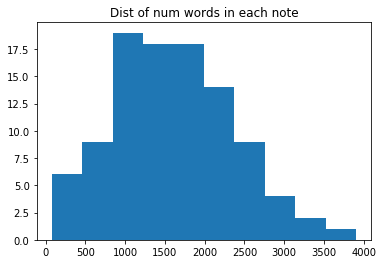

In [165]:
plt.hist(num_toks)
plt.title("Dist of num words in each note")
plt.show()

In [190]:
def a():
    return 1, 2, 3

In [194]:
b, c, d = a()
b, c, d = a()

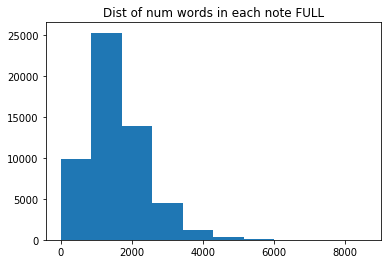

In [213]:
num_toks_full = full.text_tok_in.apply(lambda x: len(x))
plt.hist(num_toks_full)
plt.title("Dist of num words in each note FULL")
plt.show()

In [215]:
np.median(num_toks_full)

1434.0

In [216]:
np.mean(num_toks_full)

1571.9907195939822

In [225]:
num_icd9_full = full.ICD9_codes.apply(lambda x: len(x))
num_high_levels_full = full.high_levels.apply(lambda x: len(x))

In [227]:
print(np.mean(num_icd9_full))
print(np.mean(num_high_levels_full))

11.331484502446981
5.9874388254486135


In [228]:
#num_toks_raw = notes.TEXT.apply(lambda x: len(nltk.word_tokenize(x)))

## Label distribution